# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')

In [2]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [4]:
def seasons_india(month):
    if month in [12, 1, 2]:
        return 1   # Winter
    elif month in [3, 4, 5]:
        return 2   # Summer
    elif month in [6, 7, 8, 9]:
        return 3   # Monsoon
    else:
        return 4   # Post-monsoon

df['indian_season'] = df['month'].map(seasons_india)

In [5]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,indian_season
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,1


## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [6]:
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,indian_season
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1,1


In [7]:
df.tail(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,indian_season
datetime,,,,,,,,,,,,,,,,,,,,
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,19,51,2,Wednesday,2012,12,22,1
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012-12-19,19,51,2,Wednesday,2012,12,23,1


In [8]:
df.shape

(10886, 20)

**Відповідь:** У даному наборі даних міститься 10 886 рядків та 19 стовпців. Рівень деталізації - погодинний кожного дня, тобто один рядок = одна година.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


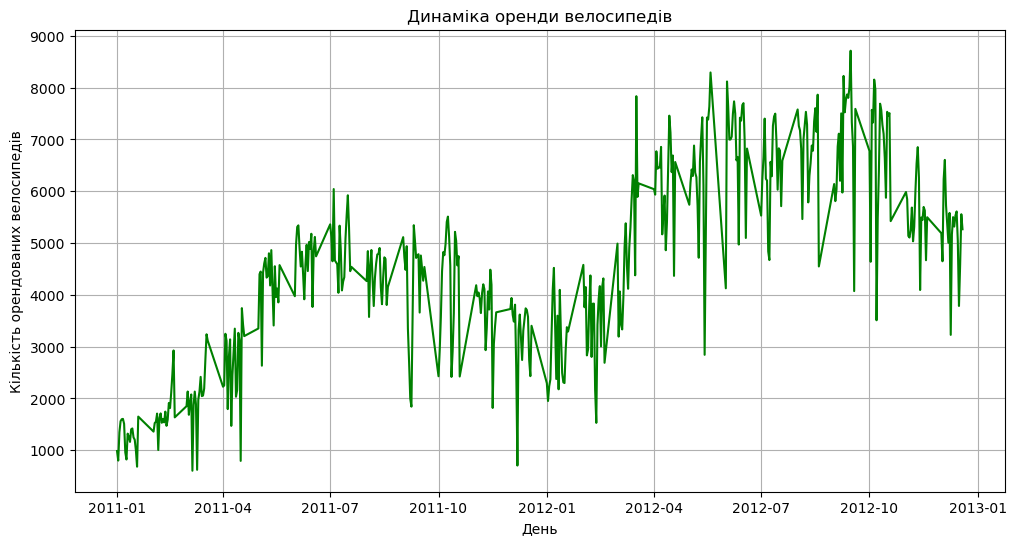

In [9]:
daily_rent = df.groupby('date')['count'].sum()

daily_rent.plot(
    figsize=(12, 6),
    kind='line',
    color='green',
    xlabel='День',
    ylabel='Кількість орендованих велосипедів',
    title='Динаміка оренди велосипедів',
    grid=True
);

**Відповіді:**
1. *Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?*  
    Графік має заломи через значні коливання денної кількости ренди. Це може бути через різницю оренди у будні та вихідні (на вихідних більше орендують, а в будні дні набагато менше), також причиною можуть бути погодні умови чи технічні збої. Можна додати moving average і тоді графік буде виглядатии більш плавним, але все ще показуватиме ту саму тенденцію.
2. *Які загальні тенденції ви бачите на графіку?*  
    Перш за все, помітно значно вищий попит на оренду у 2012 році, порівняно з 2011. І ще видно, що протягом обох років річний цикл оренди залишається таким же: з січня по липень щоденна оренда зростає, а з липня по грудень падає. 
3. *Чи помітні якісь сезонні коливання?*  
    Так, сезонність дуже добре помітна. Пік оренд припадає на літні місяці - липень-серпень(в Індії це сезон мусонів) - кількість орендованих велосипедів в цей період найвища та нійбільш стабільна, без надто різких коливань по днях. Ще один пік можна спостерігати у жовтні-листопаді (сезон пост-мусону), але тут і більші коливання, що можуть бути спричинені зміною погодних умов. З грудня по березень (сезон зими) оренда найменша.
4. *Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?*  
    Так, є як аномальні піки, так і провали. Аномально високі значення можуть бути пов'язані з вихідними чи святами з дуже хорошою погодою чи піком туристичного сезону. Серед можливих причин аномально низьких значень можуть бути: погані погодні умови, державні свята чи технічні збої.



## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

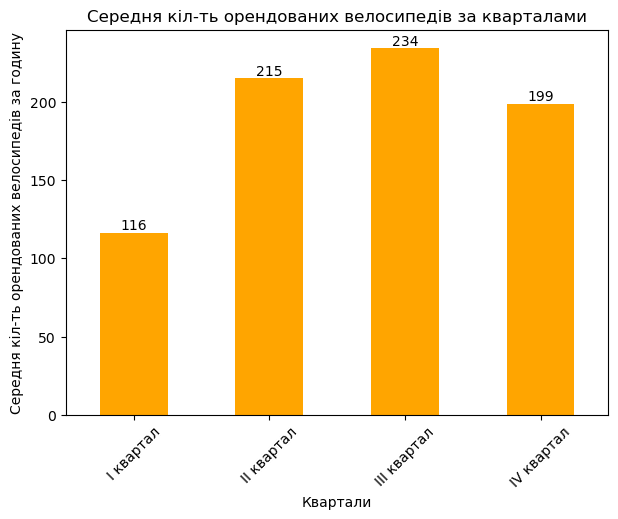

In [10]:
seasonality = df.groupby('season')['count'].mean().reset_index()

ax = seasonality.plot.bar(
    figsize=(7,5),
    x='season',
    y='count',
    color = 'orange',
    xlabel='Квартали',
    ylabel='Середня кіл-ть орендованих велосипедів за годину',
    title='Середня кіл-ть орендованих велосипедів за кварталами',
    legend=False
)

ax.set_xticklabels(['I квартал', 'II квартал', 'III квартал', 'IV квартал'])
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.xticks(rotation=45);


**Відповіді:**
1. *В який квартал найбільша середня кількість оренди велосипедів?*  
    Найбільша середня кількість оренд погодинно припадає на III квартал.
2. *Як ви можете пояснити таку сезонну закономірність?*  
    III квартал - це липень-вересень, тобто літні місяці, коли погодні умови є найбільш сприятливими для поїздок: теплі та довгі дні, люди проводять більше часу на вулиці та обирають більш активні види дозвілля.
3. *У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталами?*  
    Найпопулярніший квартал (III) має близько 234 оренд на годину в середньому, а найменш популярний (I) - приблизно 116. Тож, оренда у III кварталі приблизно у 2 рази вища, ніж у I.

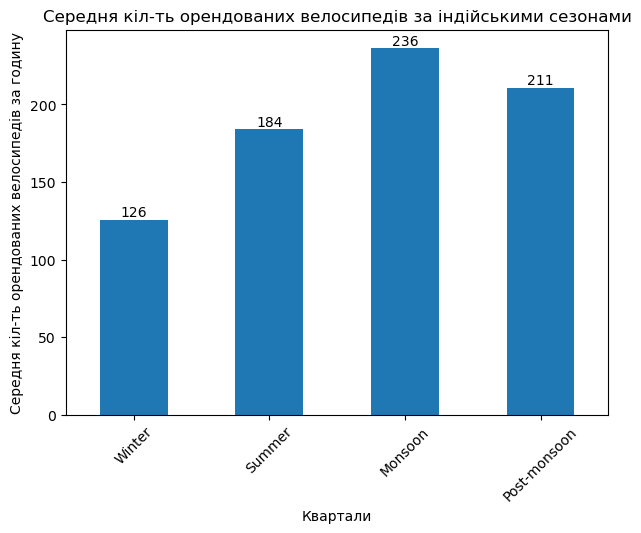

In [11]:
indian_seasonality = df.groupby('indian_season')['count'].mean().reset_index()

ax = indian_seasonality.plot.bar(
    figsize=(7,5),
    x='indian_season',
    y='count',
    xlabel='Квартали',
    ylabel='Середня кіл-ть орендованих велосипедів за годину',
    title='Середня кіл-ть орендованих велосипедів за індійськими сезонами',
    legend=False
)

ax.set_xticklabels(['Winter', 'Summer', 'Monsoon', 'Post-monsoon'])
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.xticks(rotation=45);

Якщо розглядати справжній індійський поділ на сезони, то закономірності стають більш виразнішими. Найвищий попит у сезон Monsoon (червень-вересень) - середня оренда сягає 236 за годину, що приблизно у 1,9 раза більше, ніж у найменш активний сезон Winter (грудень-лютий). Сезон дощів приносить прохолоду, в короткочасні дощі не знижують мобільність населення. 

Загалом, можна зробити висновок, що на попит на оренду велосипедів найбільше впливають погодні умови, зокрема температура та сезон. Теплі періоди сприяють підвищенню попиту, тоді як холодні призводять до суттєвого зниження. 

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


''

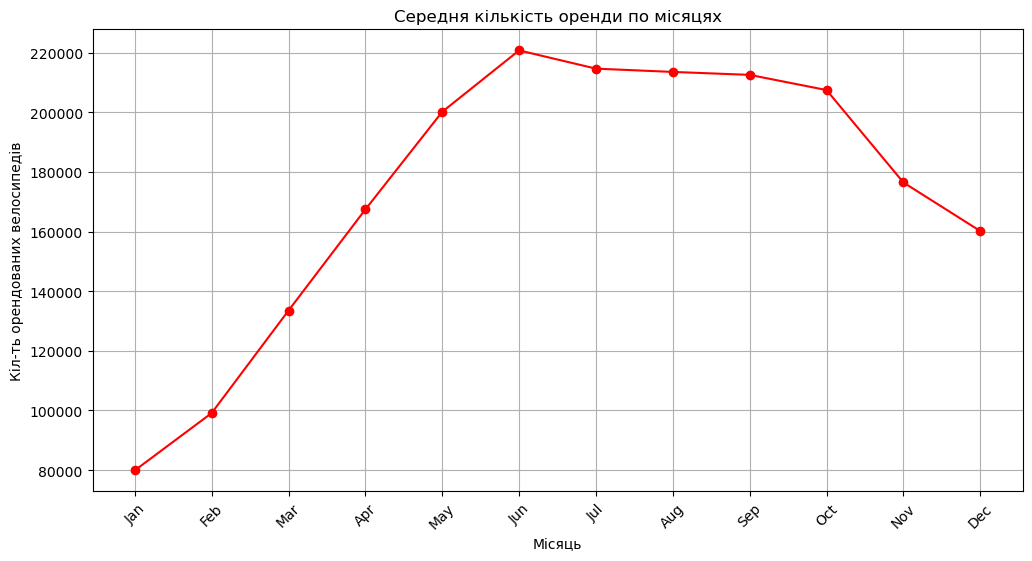

In [12]:
monthly_dynamic = df.groupby('month')['count'].sum()

monthly_dynamic.plot(
    figsize=(12,6),
    title='Середня кількість оренди по місяцях',
    xlabel='Місяць',
    ylabel='Кіл-ть орендованих велосипедів',
    grid=True,
    marker='o',
    color='red'
)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(range(1, 13), month_names, rotation=45)
;

**Відповіді:**
1. *В які місяці спостерігається пік та спад оренди?*  
    Пік оренди спостерігається у червні, після червня попит поступово знижується, хоча залишається високим аж до жовтня. Найнижчі значення демонструє січень.
2. *Чи збігається ця закономірність з результатами з попереднього завдання?*  
    Ця закономірність цілком відповідає попереднім дослідженням і підтверджує як квартальний, так і сезонний тренди.
3. *Як може вплинути клімат на оренду велосипедів протягом року?*  
    Клімат є ключовим фактором сезонності оренди. Вплив може бути через:  
        - Температуру: теплі дні з травня по жовтень стимулюють активність клієнтів та збільшують кіллькість орендованих велосипедів. У зимові місяці, коли температура падає - люди менше користуються велосипедами.  
        - Сезон дощів (Monsoon) у Індії: Особливість Індії в тому, що попри дощі, попит не падає, а навпаки залишається дуже високим. Це через те, що сезон дощів створює максимально комфортний температурний режим для активності (дощі знімають спеку і вони не настільки сильні, щоб перешкоджати велосипедному руху)  
        -   Тривалість світлового дня: Улітку світловий день довший, тож більше можливостей для поїздок. Узимку темніє раніше - тож відбувається спад оренди.  

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

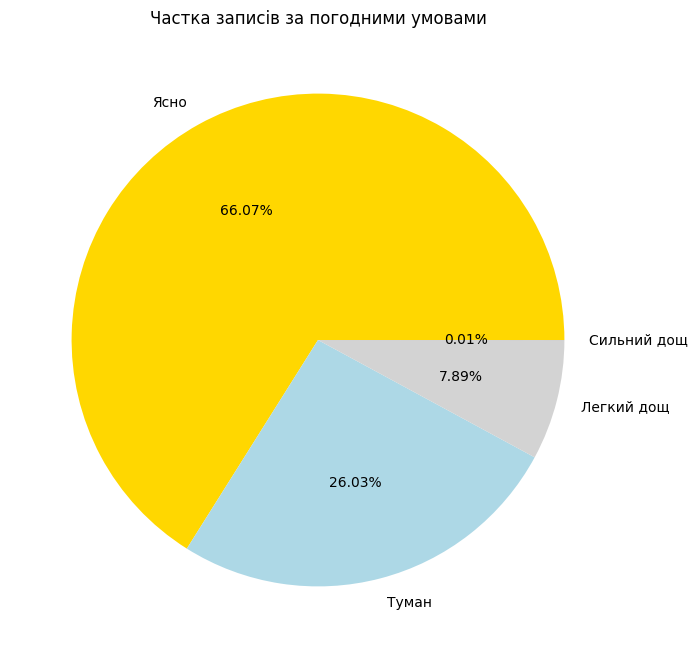

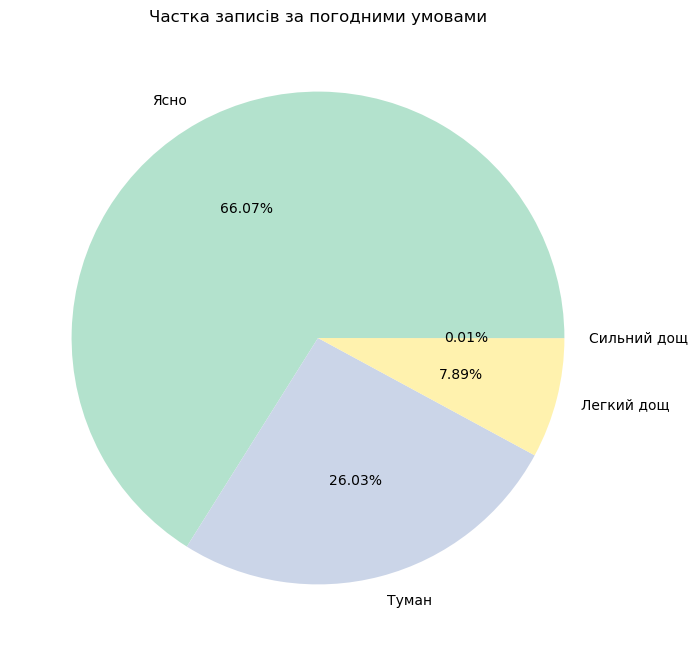

In [13]:
weather_share = df['weather'].value_counts().sort_index()

weather_share.plot.pie(
    figsize=(8, 8),
    autopct='%1.2f%%',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    title='Частка записів за погодними умовами',
    ylabel='',
    colormap = 'Pastel2'
);

**Відповіді:**
1. *Яка погода переважає в датасеті?*  
    В датасеті однозначно переважає Ясна погода, на її частку припадає близько 66% записів.Туманна погода займає трохи більше 26%, а Легкий дощ становить близьеко 8%.
2. *Чи є дні із сильним дощем? Яка їх частка?*  
    Записів із Сильним дощем майже немає, їх частка лише 0.01%. Тож дні із сильним дощем - рідке явище.
3. *Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?*
    Погодні умови є одним із основних факторів, які впливають на попит:  
        - Ясна погода: стимулює попит, люди активно орендують велосипеди для поїздок.  
        - Туман: видимість гірша, попит знижується, але не критично.  
        - Легкий дощ: хоча він і не заважає руху надто сильно, але все рівно спричиняє досить вагоме зниження попиту.  
        - Сильний дощ: попит майже на нулі.  
        Тож, чим гірші погодні умови, тим менше кількість орендованих велосипедів.


## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

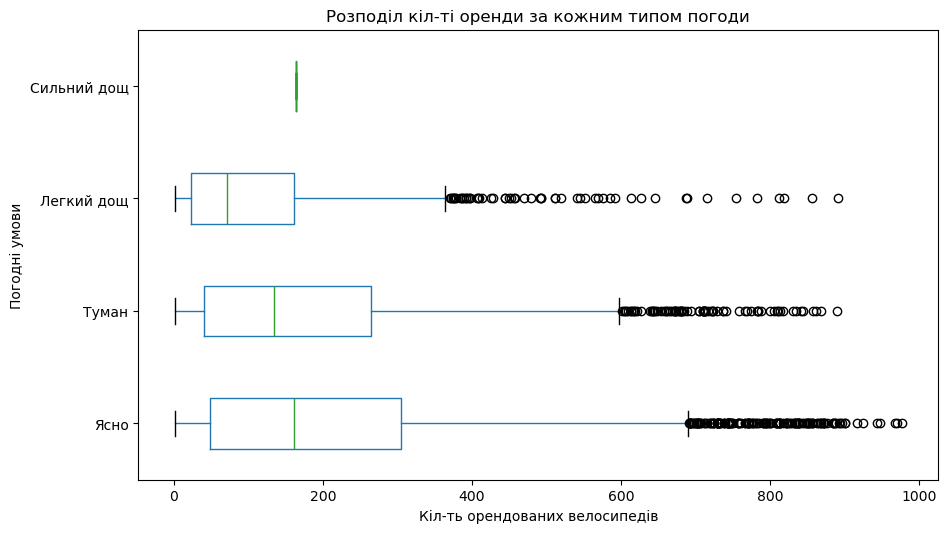

In [14]:
df.boxplot(
    column='count',
    by='weather',
    figsize=(10, 6),
    grid=False,
    vert=False
)
plt.title('Розподіл кіл-ті оренди за кожним типом погоди')
plt.suptitle('')
plt.xlabel('Кіл-ть орендованих велосипедів')
plt.ylabel('Погодні умови')

plt.yticks(
    [1, 2, 3, 4],
    ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
)

plt.show()


**Відповіді:**
1. *При якій погоді найбільший розкид у кількості оренди?*  
    Найбільший розкид кількості оренди спосетрігається при ясній погоді. Це видно за найбільшою довжиною "вусиків" і великої кількістю віддалених точок. При туманній погоді розкид теж досить широкий, де теж є багато пікових значень оренд. При легкому дощі - розкид помірний, а при сильному - мінімальний.
2. *Чи є викиди (outliers) в даних? При якій погоді?*  
    З графіку видно що є досить багато викидів. Найбільше їх при ясній погоді - часто зустрічаються дні з високою кількістю оренд. При туманній погоді теж є багато днів з дуже високою кількістю оренди - люди все ще активно орендують велосипеди навіть у туманні дні. Також викиди є і при легкому дощі, але їх менше. При сильному дощі викидів немає.
3. *При якій погоді медіанне значення оренди найвище?*  
    Найвище медіанне значення - при ясній погоді, що відповідає очікуванням. Також досить висока медіана спостерігається і при туманній погоді, тож попит у такі дні знижується не суттєво.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

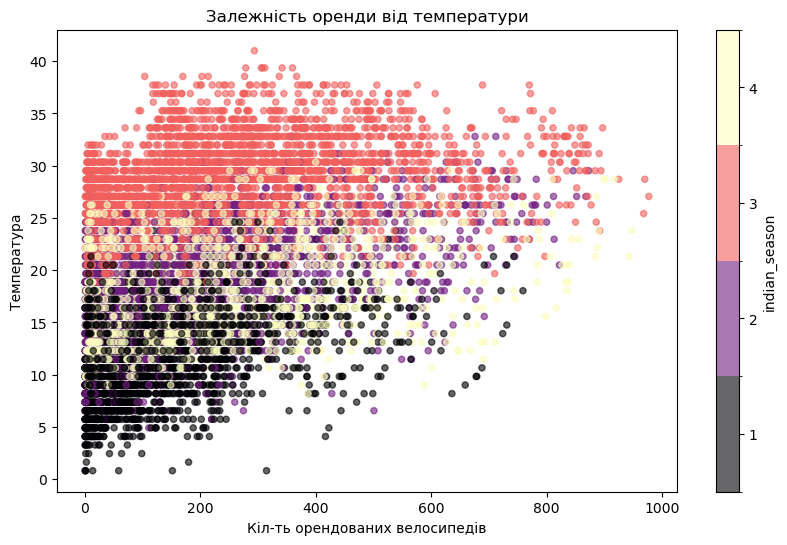

In [15]:
df['indian_season'] = df['indian_season'].astype('category')

df.plot.scatter(
    x='count',
    y='temp',
    c='indian_season',
    colormap='magma',
    title='Залежність оренди від температури',
    xlabel='Кіл-ть орендованих велосипедів',
    ylabel='Температура',
    figsize=(10, 6),
    alpha=0.6
)
plt.show()

**Відповідь**  
*Чи є зв'язок між температурою та кількістю оренди? Який?*  
    Попри розкид значень, на графіку спостерігається позитивний, але нелінійний зв’язок між температурою та кількістю оренд. Більшість точок зосереджені в діапазоні 0–500 оренд, і саме тут найчіткіше видно, що зі зростанням температури оренда поступово підвищується. Високі значення оренд (500–1000) зустрічаються рідко й переважно лише при високих температурах, що свідчить про те, що тепла погода створює умови для високого попиту, але не гарантує його. Загалом температура має помірний позитивний вплив на кількість оренд.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

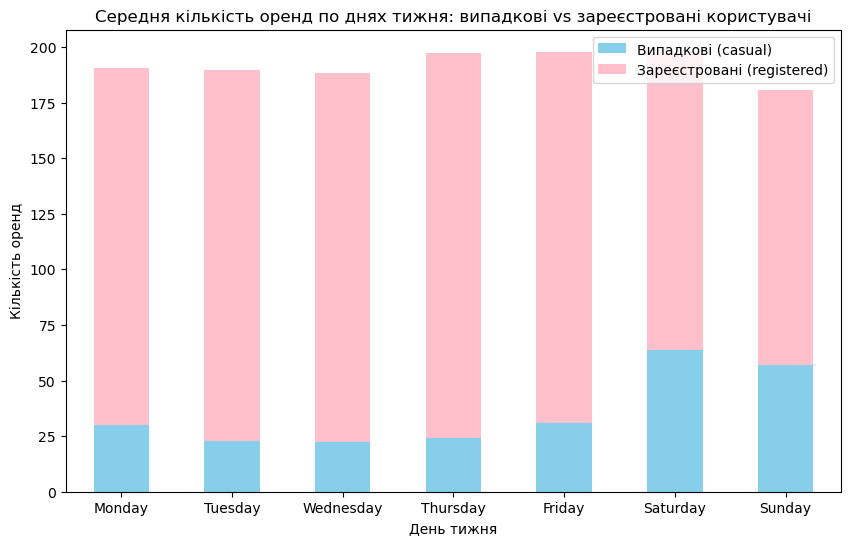

In [16]:
users_by_day = df.groupby('weekday_num')[['casual', 'registered']].mean()
users_by_day.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

users_by_day.plot.bar(
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'pink'],
    title='Середня кількість оренд по днях тижня: випадкові vs зареєстровані користувачі',
    xlabel='День тижня',
    ylabel='Кількість оренд'
)

plt.legend(['Випадкові (casual)', 'Зареєстровані (registered)'])
plt.xticks(rotation=0)
plt.show();



**Відповіді:**  
1. *В які дні тижня більше оренд від зареєстрованих користувачів?*  
    У будні дні — з понеділка по п’ятницю — кількість оренд від зареєстрованих користувачів є значно вищою, особливо у четвер і п’ятницю, тоді як у вихідні вона помітно зменшується.
2. *Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?*  
    Така різниця пояснюється тим, що зареєстровані користувачі переважно використовують велосипеди як щоденний транспорт для поїздок на роботу чи навчання, тому їхня активність максимальна в будні. Натомість випадкові користувачі найчастіше орендують велосипеди у вихідні, коли мають більше вільного часу для прогулянок і відпочинку, що створює контраст у патернах використання протягом тижня.